<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//*** Katrina Cwiertniewicz
//*** Introduction to Data Science IS1
//***10/5/2025
//*** Project 4: Problem 1 Python
###The purpose of this assignment is to create contingency tables and answer questions using Python to analyze the datasets provided.


In [15]:
# Start rmagic to mix Python and R code cells
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# **Problem 1**

In [17]:
adult_trainingDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/refs/heads/main/HW4/adult_training.csv");

adult_trainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


**Cross tabulation of Workclass and Sex**

In [18]:
p_crosstab = pd.crosstab(adult_trainingDF.workclass, adult_trainingDF.sex)

print(p_crosstab)


sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


**Cross tabulation of Sex and Marital Status**

In [19]:
p_crosstab = pd.crosstab(adult_trainingDF['marital-status'], adult_trainingDF.sex)

print(p_crosstab)


sex                    Female  Male
marital-status                     
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


**Adults over 40 Data Frame**

In [20]:
adultOver40 = adult_trainingDF[adult_trainingDF['age'] > 40].copy()

adultOver40

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


**Cross tabulation of Sex and Marital Status: Adults Over 40**

In [21]:
p_crosstab = pd.crosstab(adultOver40 ['marital-status'], adultOver40.sex)

print(p_crosstab)

sex                    Female  Male
marital-status                     
Divorced                  720   448
Married-civ-spouse        305  3383
Married-spouse-absent      38    47
Never-married             256   315
Separated                 133    74
Widowed                   354    71


**Determine whether any outliers exist for the education field**

In [22]:
adult_trainingDF['education'].value_counts()

,count
education,
9,4777
10,3323
13,2405
14,788
11,599
7,534
12,478
6,423
4,283


<Axes: >

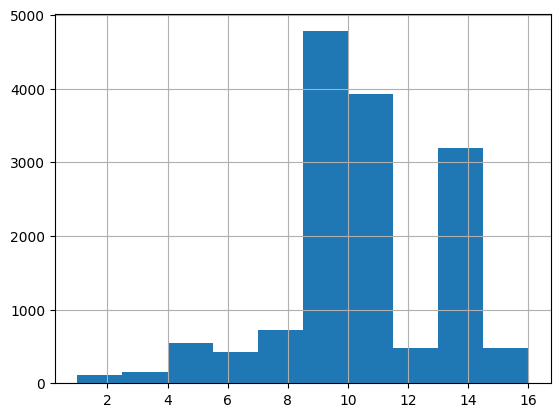

In [23]:
adult_trainingDF.education.hist()

In [24]:
adult_trainingDF['education'].describe()

,education
count,14797.000000
mean,10.068798
std,2.598297
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


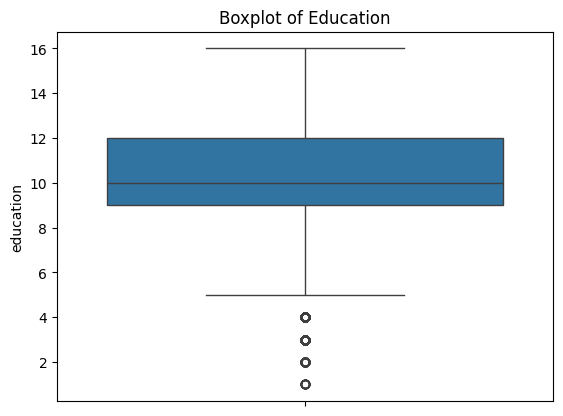

In [25]:
sns.boxplot(adult_trainingDF['education'])
plt.title('Boxplot of Education')
plt.show()

The outliers that exists for the educaiton field are values 1-4.

**Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?**

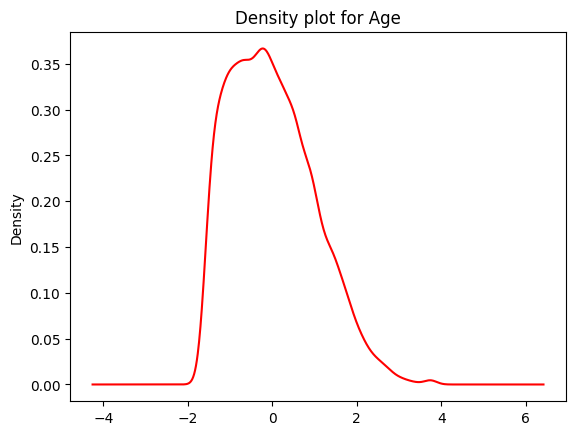

In [26]:
adult_trainingDF['scaled_age'] = stats.zscore(adult_trainingDF.age, nan_policy='omit')


adult_trainingDF.scaled_age.plot.density(color="red")
plt.title('Density plot for Age')
plt.show()

In [27]:
standard_scaler = StandardScaler()

scaled_duration_standard = standard_scaler.fit_transform(np.array(adult_trainingDF.age).reshape(-1,1))

print("Output from StandardScaler:")
display(scaled_duration_standard)


Output from StandardScaler:


array([[ 0.82703775],
       [-0.05025705],
       [ 0.75392985],
       ...,
       [-0.48890445],
       [ 1.41190094],
       [-1.21998344]])

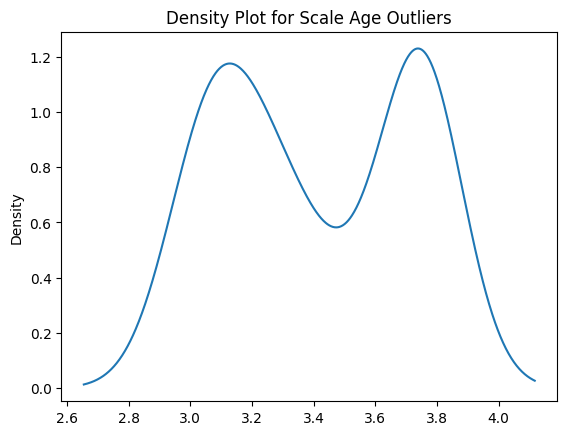

In [28]:
adult_training_outliers = adult_trainingDF.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

adult_training_outliers.plot.density()
plt.title('Density Plot for Scale Age Outliers')
plt.show()


In [29]:
num_outliers = len(adult_training_outliers)

print("Number of outliers:", num_outliers)

Number of outliers: 60


There are 60 outliers after standardizing the age variable.

In [30]:
most_extreme_outlier = adult_training_outliers.abs().max()

print("The most extreme outlier is:", most_extreme_outlier)

The most extreme outlier is: 3.7513537300721516


The most extreme oultier is 3.75

**Age anomaly? Select only records with age at least 80, and construct a histogram of age. Explain what you see.**

<Axes: >

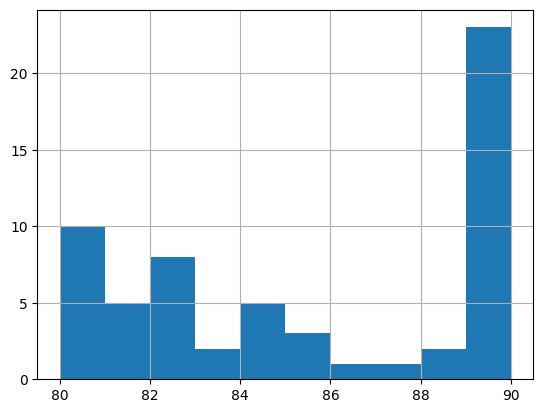

In [31]:
adultAtLeast80 = adult_trainingDF[adult_trainingDF['age'] >= 80].copy()

adultAtLeast80.age.hist()

After observing the histogram that includes only individuals 80 and above, there is an increased spike of individuals who are 90. Over 20 indiviudals compared to 10 or less when compared to the other ages of this dataset.

In comparison to my version in python, there is a discrepency between the 80 values being higher in the R verison even though they should display the same results.

The largest group from this study is from Male Spouses married to civilians(6010). This number is the same when looking at individuals over 40 (3383)

For education, a majority of the data consists of schooling from 9-12 years, with the median being 10 years of schooling.

Ages 15-45 have the most individuals who are part of this data set. This range includes 2500 or more individuals from the dataset. From there, this number steadily declines. However, from our Over 80 search, we see that there is a spike with individuals who are 90 years of age. Although this is a smaller number when compared with the overall age data, this could still be an outlier to study.



